In [ ]:
#------------------------------------------------- ANÁLISIS DE SENTIMIENTO --------------------------------------------#

In [ ]:
# ---------------------- 1. Identificación de Columnas

In [1]:
import pandas as pd
import json
import os

# Nombre del archivo JSON convertido desde CSV
json_file = "df_json/converted_from_csv_combined.json"

# Leer y mostrar las columnas del archivo JSON convertido desde CSV
if os.path.exists(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        columnas = df.columns.tolist()
        print(f"Columnas del Archivo JSON convertido:")
        print(columnas)
else:
    print(f"El archivo {json_file} no existe.")


Columnas del Archivo JSON convertido:
['_id', 'Unnamed: 0', 'game_id', 'period_id', 'time_seconds', 'team_id', 'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'original_event_id', 'bodypart_id', 'type_id', 'result_id', 'action_id', 'type_name', 'result_name', 'bodypart_name', 'eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId', 'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id', 'tagsList', 'pos_orig_y', 'pos_orig_x', 'pos_dest_y', 'pos_dest_x', 'game_id-0', 'period_id-0', 'time_seconds-0', 'team_id-0', 'player_id-0', 'start_x-0', 'start_y-0', 'end_x-0', 'end_y-0', 'bodypart_id-0', 'type_id-0', 'result_id-0', 'type_name-0', 'result_name-0', 'bodypart_name-0', 'time_played-0', 'game_id-1', 'period_id-1', 'time_seconds-1', 'team_id-1', 'player_id-1', 'start_x-1', 'start_y-1', 'end_x-1', 'end_y-1', 'bodypart_id-1', 'type_id-1', 'result_id-1', 'type_name-1', 'result_name-1', 'bodypart_name-1', 'time_played-1', 'game_id-2', 'period_id-2', 'time_secon

In [ ]:
# ---------------------- 2. Realizar Análisis de Sentimiento y Cuantitativo

Archivo JSON leído y convertido a DataFrame.
Columnas del DataFrame combinado:
['_id', 'Unnamed: 0', 'game_id', 'period_id', 'time_seconds', 'team_id', 'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'original_event_id', 'bodypart_id', 'type_id', 'result_id', 'action_id', 'type_name', 'result_name', 'bodypart_name', 'eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId', 'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id', 'tagsList', 'pos_orig_y', 'pos_orig_x', 'pos_dest_y', 'pos_dest_x', 'game_id-0', 'period_id-0', 'time_seconds-0', 'team_id-0', 'player_id-0', 'start_x-0', 'start_y-0', 'end_x-0', 'end_y-0', 'bodypart_id-0', 'type_id-0', 'result_id-0', 'type_name-0', 'result_name-0', 'bodypart_name-0', 'time_played-0', 'game_id-1', 'period_id-1', 'time_seconds-1', 'team_id-1', 'player_id-1', 'start_x-1', 'start_y-1', 'end_x-1', 'end_y-1', 'bodypart_id-1', 'type_id-1', 'result_id-1', 'type_name-1', 'result_name-1', 'bodypart_name-1', 'time_played-1'

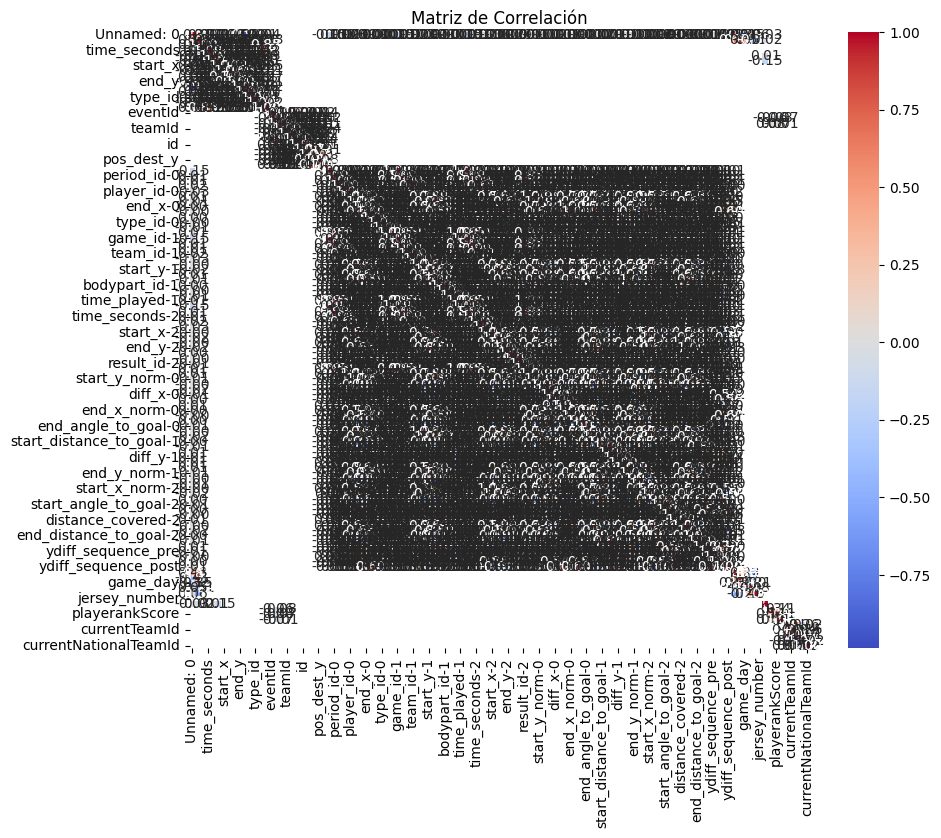

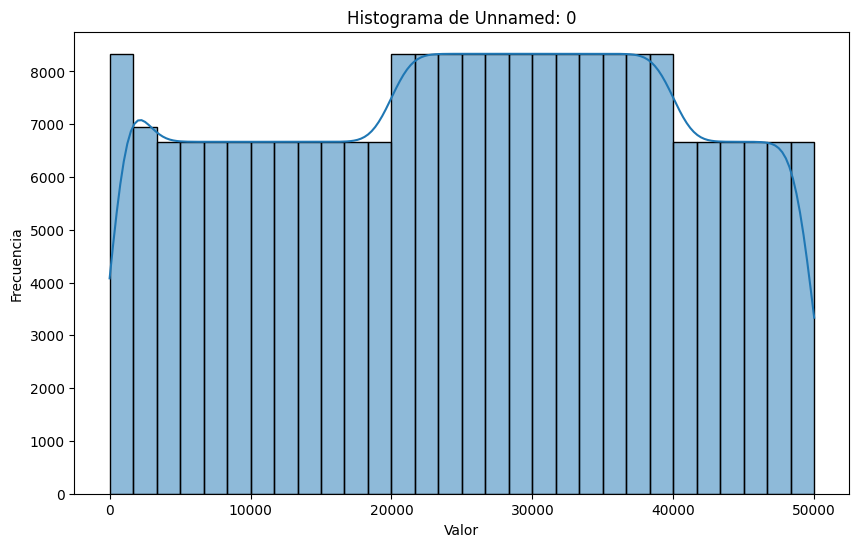

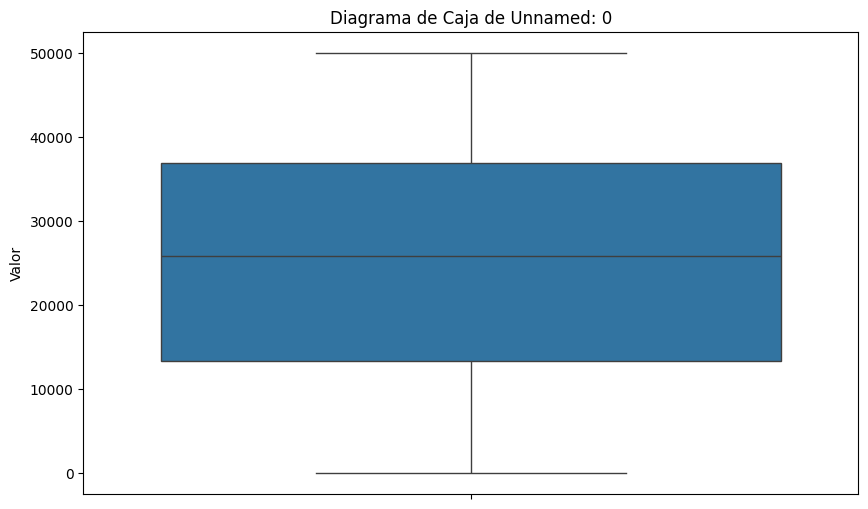

C:\Users\josug\AppData\Local\Temp\ipykernel_15828\2049696294.py:168: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  most_common_value = combined_df.applymap(str).apply(pd.Series.value_counts).fillna(0).sum(axis=1).idxmax()


In [ ]:
import pandas as pd
import json
import os
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre del archivo JSON convertido desde CSV
json_file = "df_json/converted_from_csv_combined.json"

# Leer el archivo JSON convertido desde CSV
if os.path.exists(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
        combined_df = pd.DataFrame(data)
        print("Archivo JSON leído y convertido a DataFrame.")
else:
    print(f"El archivo {json_file} no existe.")

# Mostrar las columnas del DataFrame
columnas = combined_df.columns.tolist()
print(f"Columnas del DataFrame combinado:")
print(columnas)

# Realizar Análisis de Sentimiento si hay columna de texto
if 'texto' in combined_df.columns:
    # Función para realizar el análisis de sentimiento
    def analizar_sentimiento(texto):
        blob = TextBlob(texto)
        return blob.sentiment.polarity, blob.sentiment.subjectivity

    combined_df['polaridad'], combined_df['subjetividad'] = zip(*combined_df['texto'].map(analizar_sentimiento))
    print("Análisis de sentimiento realizado.")

    # Visualización 1: Distribución de la polaridad
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['polaridad'], bins=30, kde=True)
    plt.title('Distribución de la Polaridad')
    plt.xlabel('Polaridad')
    plt.ylabel('Frecuencia')
    plt.show()

    # Visualización 2: Distribución de la subjetividad
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['subjetividad'], bins=30, kde=True)
    plt.title('Distribución de la Subjetividad')
    plt.xlabel('Subjetividad')
    plt.ylabel('Frecuencia')
    plt.show()

    # Visualización 3: Polaridad vs Subjetividad
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='polaridad', y='subjetividad', data=combined_df)
    plt.title('Polaridad vs Subjetividad')
    plt.xlabel('Polaridad')
    plt.ylabel('Subjetividad')
    plt.show()

    # Visualización 4: Polaridad Promedio por Categoría (si hay columna 'categoria')
    if 'categoria' in combined_df.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='categoria', y='polaridad', data=combined_df, estimator=lambda x: sum(x) / len(x))
        plt.title('Polaridad Promedio por Categoría')
        plt.xlabel('Categoría')
        plt.ylabel('Polaridad Promedio')
        plt.show()

    # Visualización 5: Subjetividad Promedio por Categoría (si hay columna 'categoria')
    if 'categoria' in combined_df.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='categoria', y='subjetividad', data=combined_df, estimator=lambda x: sum(x) / len(x))
        plt.title('Subjetividad Promedio por Categoría')
        plt.xlabel('Categoría')
        plt.ylabel('Subjetividad Promedio')
        plt.show()

    # Visualización 6: Boxplot de la Polaridad por Categoría (si hay columna 'categoria')
    if 'categoria' in combined_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='categoria', y='polaridad', data=combined_df)
        plt.title('Distribución de la Polaridad por Categoría')
        plt.xlabel('Categoría')
        plt.ylabel('Polaridad')
        plt.show()

    # Visualización 7: Boxplot de la Subjetividad por Categoría (si hay columna 'categoria')
    if 'categoria' in combined_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='categoria', y='subjetividad', data=combined_df)
        plt.title('Distribución de la Subjetividad por Categoría')
        plt.xlabel('Categoría')
        plt.ylabel('Subjetividad')
        plt.show()

    # Visualización 8: Nube de Palabras (suponiendo que hay una columna 'texto')
    from wordcloud import WordCloud

    texto_combined = " ".join(texto for texto in combined_df['texto'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texto_combined)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('Nube de Palabras')
    plt.show()

    # Visualización 9: Conteo de la Polaridad Positiva, Neutra y Negativa
    plt.figure(figsize=(10, 6))
    sns.countplot(x=pd.cut(combined_df['polaridad'], bins=[-1, -0.1, 0.1, 1], labels=['Negativa', 'Neutra', 'Positiva']))
    plt.title('Conteo de la Polaridad')
    plt.xlabel('Polaridad')
    plt.ylabel('Frecuencia')
    plt.show()

    # Visualización 10: Conteo de la Subjetividad Baja, Media y Alta
    plt.figure(figsize=(10, 6))
    sns.countplot(x=pd.cut(combined_df['subjetividad'], bins=[0, 0.33, 0.66, 1], labels=['Baja', 'Media', 'Alta']))
    plt.title('Conteo de la Subjetividad')
    plt.xlabel('Subjetividad')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("No se encontró una columna de texto para realizar el análisis de sentimiento.")

# Análisis Cuantitativo (ajustar según columnas disponibles)
# Identificación de columnas numéricas
numeric_columns = combined_df.select_dtypes(include=[float, int]).columns
if not numeric_columns.empty:
    # Visualización 1: Estadísticas descriptivas de columnas numéricas
    print("Estadísticas descriptivas:")
    print(combined_df[numeric_columns].describe())

    # Visualización 2: Matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(combined_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación')
    plt.show()

    # Visualización 3: Histograma de una columna numérica específica (ajustar según columnas disponibles)
    columna_numerica = numeric_columns[0]
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df[columna_numerica], bins=30, kde=True)
    plt.title(f'Histograma de {columna_numerica}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

    # Visualización 4: Diagrama de caja para una columna numérica específica (ajustar según columnas disponibles)
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=columna_numerica, data=combined_df)
    plt.title(f'Diagrama de Caja de {columna_numerica}')
    plt.ylabel('Valor')
    plt.show()

    # Visualización 5: Conteo de valores únicos en alguna columna (ajustar según columnas disponibles)
    if 'alguna_columna' in combined_df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y='alguna_columna', data=combined_df, order=combined_df['alguna_columna'].value_counts().index)
        plt.title('Conteo de Valores Únicos en Alguna Columna')
        plt.xlabel('Frecuencia')
        plt.ylabel('Valor')
        plt.show()
else:
    print("No se encontraron columnas numéricas para realizar el análisis cuantitativo.")

# Visualización adicional: Dato que más se repite
if not combined_df.empty:
    most_common_value = combined_df.applymap(str).apply(pd.Series.value_counts).fillna(0).sum(axis=1).idxmax()
    most_common_count = combined_df.applymap(str).apply(pd.Series.value_counts).fillna(0).sum(axis=1).max()
    print(f"El dato que más se repite es '{most_common_value}' con {most_common_count} repeticiones.")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=[most_common_value], y=[most_common_count])
    plt.title('Dato más repetido')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()
